<a href="https://colab.research.google.com/github/ricotta-jpgomes/analises/blob/main/paroquias_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Paróquias brasileiras no YouTube no contexto da pandemia de COVID-19 

Bom gente, eu sou graduado em Ciências Sociais e durante a graduação me interesei muito pela Sociologia da Religião e pelos estudos sobre a religião de um modo geral. Essa exploração de dados é uma forma de amarrar meus interesses de ontem e de hoje, e também uma forma de "ensaio" sobre o que eu pretendo levar ao mestrado acadêmico. 

A Proposta dessa análise exporatória é levantar algumas informações sobre canais de paróquias criadas no YouTube a partir da pandemia. A impossibilidade de manter os cultos presenciais nos templos religiosos acabou empurrando muitos deles para os ambientes digitais.

Como se deu essa transição? Após 2 anos, o YouTube ainda possui lugar de destaque nas estratégias de comunicação religiosa das paróquias? Quais delas foram as mais bem-sucedidas em termos de visualizações e inscritos? Depois do retorno aos cultos presenciais, elas ainda se mostram ativas na plataforma? 

In [2]:
# importações
import pandas as pd

In [3]:
# inicializando o google drive no notebook para acessar meus arquivos
from google.colab import drive
drive.mount('/content/drive') # tudo certo!

Mounted at /content/drive


Os dados foram coletados através do YouTube data API v3, utilizando o código disponível [nesse link ](https://drive.google.com/file/d/1gwopLYPCA2EgPwD5Tdt2cykobPKKcMZp/view?usp=sharing). A extração foi realizada no dia 08/10/2022, e o arquivo aberto para análise possui dados relativos a 508 canais de paróquias no YouTube. 

In [4]:
# abrindo o arquivo
paroquias = pd.read_csv('/content/drive/MyDrive/Datasets/paroquias_2022-10-08.csv')
paroquias # tudo certo!

,id,title,publishedAt,description,views,subscribers,videos
0,UCZ6kwKHkZA6Wbf5VybFz0Ng,Paróquia de Beduído,2020-03-21T12:11:13Z,Comunidade católica da freguesia de Beduído-Es...,11203,575,66
1,UC_Aa5JhPzigjjBX-busHUuQ,Paróquia Santa Luzia Hortolândia - SP,2020-04-07T04:10:49Z,Canal de Evangelização da Paróquia Santa Luzia...,175799,4040,688
2,UCzLAtLo_57Ibht8zE3Vspmg,Paróquia de Tucano,2020-05-13T20:35:54Z,NaN,127322,2430,585
3,UC8uxLx_iWLmOHJEDvFIDt7A,Paróquia de Araci,2017-05-20T22:06:31Z,NaN,227954,2930,847
4,UCQP-AugQdFKd06blVXXHYzA,Paróquia de Cunha,2017-08-13T19:48:40Z,Perfil Oficial da Paróquia Nossa Senhora da Co...,49097,1520,243
...,...,...,...,...,...,...,...
503,UCaLAkSLC75i8pReUp8WV4oQ,Paróquia São Pedro - Ponte Nova,2020-04-04T12:29:07Z,Canal Oficial da Paróquia São Pedro - Ponte No...,127753,2720,579
504,UCLsTpEKgGsLVptFDbCJVrYg,Paróquia São José Operário - Tijuco,2021-04-10T19:20:14Z,Canal oficial da Paróquia de São José Operário...,45213,1890,70
505,UCJMGA6pcXw_Q61H7GyT80Tw,PARÓQUIA SAÚDE MUCURIPE,2020-04-14T20:25:37Z,Paróquia de N. Sra. da Saúde • Mucuripe (85) 3...,97911,2880,968
506,UClx5JxlY8VOpDDOqllhxKYQ,Paróquia Nossa Sra. de Fátima - IPS,2018-09-23T13:33:23Z,Canal da Paróquia N. Sra. de Fátima - Campos d...,87863,2500,726


In [5]:
paroquias.dtypes

id             object
title          object
publishedAt    object
description    object
views           int64
subscribers     int64
videos          int64
dtype: object

Podemos observar que a coluna publishedAt não possui dados no formato datetime, que será bastante útil na hora de filtrarmos as páginas que queremos analisar. Realizamos a conversão no bloco de códgio abaixo:

In [6]:
paroquias['publishedAt'] = pd.to_datetime(paroquias['publishedAt'])
paroquias.dtypes # tudo certo!

id                          object
title                       object
publishedAt    datetime64[ns, UTC]
description                 object
views                        int64
subscribers                  int64
videos                       int64
dtype: object

Agora, devemos selecionar do nosso dataset apenas as colunas que possuem os dados que queremos analisar. Ficamos com as colunas de 'id', 'title', 'publishedAt', 'viewCount', 'subscriberCount' e 'videoCount'.

In [7]:
paroquias = paroquias[['id', 'title', 'publishedAt', 'views', 'subscribers', 'videos']]
paroquias # tudo certo!

,id,title,publishedAt,views,subscribers,videos
0,UCZ6kwKHkZA6Wbf5VybFz0Ng,Paróquia de Beduído,2020-03-21 12:11:13+00:00,11203,575,66
1,UC_Aa5JhPzigjjBX-busHUuQ,Paróquia Santa Luzia Hortolândia - SP,2020-04-07 04:10:49+00:00,175799,4040,688
2,UCzLAtLo_57Ibht8zE3Vspmg,Paróquia de Tucano,2020-05-13 20:35:54+00:00,127322,2430,585
3,UC8uxLx_iWLmOHJEDvFIDt7A,Paróquia de Araci,2017-05-20 22:06:31+00:00,227954,2930,847
4,UCQP-AugQdFKd06blVXXHYzA,Paróquia de Cunha,2017-08-13 19:48:40+00:00,49097,1520,243
...,...,...,...,...,...,...
503,UCaLAkSLC75i8pReUp8WV4oQ,Paróquia São Pedro - Ponte Nova,2020-04-04 12:29:07+00:00,127753,2720,579
504,UCLsTpEKgGsLVptFDbCJVrYg,Paróquia São José Operário - Tijuco,2021-04-10 19:20:14+00:00,45213,1890,70
505,UCJMGA6pcXw_Q61H7GyT80Tw,PARÓQUIA SAÚDE MUCURIPE,2020-04-14 20:25:37+00:00,97911,2880,968
506,UClx5JxlY8VOpDDOqllhxKYQ,Paróquia Nossa Sra. de Fátima - IPS,2018-09-23 13:33:23+00:00,87863,2500,726


Agora vamos criar uma coluna com o ano da publicação de cada canal. Com isso, podemos agrupar os canais por ano de publicação para plotar nosso primeiro gráfico.




In [8]:
paroquias['year'] = paroquias['publishedAt'].dt.year
paroquias # tudo certo!

,id,title,publishedAt,views,subscribers,videos,year
0,UCZ6kwKHkZA6Wbf5VybFz0Ng,Paróquia de Beduído,2020-03-21 12:11:13+00:00,11203,575,66,2020
1,UC_Aa5JhPzigjjBX-busHUuQ,Paróquia Santa Luzia Hortolândia - SP,2020-04-07 04:10:49+00:00,175799,4040,688,2020
2,UCzLAtLo_57Ibht8zE3Vspmg,Paróquia de Tucano,2020-05-13 20:35:54+00:00,127322,2430,585,2020
3,UC8uxLx_iWLmOHJEDvFIDt7A,Paróquia de Araci,2017-05-20 22:06:31+00:00,227954,2930,847,2017
4,UCQP-AugQdFKd06blVXXHYzA,Paróquia de Cunha,2017-08-13 19:48:40+00:00,49097,1520,243,2017
...,...,...,...,...,...,...,...
503,UCaLAkSLC75i8pReUp8WV4oQ,Paróquia São Pedro - Ponte Nova,2020-04-04 12:29:07+00:00,127753,2720,579,2020
504,UCLsTpEKgGsLVptFDbCJVrYg,Paróquia São José Operário - Tijuco,2021-04-10 19:20:14+00:00,45213,1890,70,2021
505,UCJMGA6pcXw_Q61H7GyT80Tw,PARÓQUIA SAÚDE MUCURIPE,2020-04-14 20:25:37+00:00,97911,2880,968,2020
506,UClx5JxlY8VOpDDOqllhxKYQ,Paróquia Nossa Sra. de Fátima - IPS,2018-09-23 13:33:23+00:00,87863,2500,726,2018


Agora vamos plotar nosso primeiro gráfico! Começamos agrupando os dados a partir da coluna 'year', criada anteriormente. Então, contamos os valores da própria coluna year e plotamos esses valores em um gráfico de linha básico:

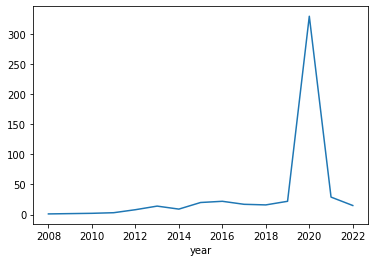

In [9]:
paroquias.groupby('year')['year'].count().plot()

Podemos observar que uma aumento muito grande na frequencia de canais criados no ano de 2020 - mais de 300 canais em uma amostra contendo 508 canais! Podemos visualizar esses valores um a um com o método value_counts() utilizado abaixo:

In [10]:
paroquias['year'].value_counts()

2020    330
2021     29
2016     22
2019     22
2015     20
2017     17
2018     16
2022     15
2013     14
2014      9
2012      8
2011      3
2010      2
2008      1
Name: year, dtype: int64

Temos exatamente 330 canais de paróquias criadas no YouTube no ano de 2020 - dentro da amostra analisada. Vamos analisar mais de perto dados relativos aos canais criados de 2020 em diante. Precisamos filtrar os dados do nosso dataframe para isolar esses dados. Conseguimos isso com a linha de código abaixo:

In [11]:
paroquias_pandemia = paroquias[(paroquias['publishedAt'].dt.year == 2020) & (paroquias['publishedAt'].dt.month >= 3)]
paroquias_pandemia # Tudo certo!

,id,title,publishedAt,views,subscribers,videos,year
0,UCZ6kwKHkZA6Wbf5VybFz0Ng,Paróquia de Beduído,2020-03-21 12:11:13+00:00,11203,575,66,2020
1,UC_Aa5JhPzigjjBX-busHUuQ,Paróquia Santa Luzia Hortolândia - SP,2020-04-07 04:10:49+00:00,175799,4040,688,2020
2,UCzLAtLo_57Ibht8zE3Vspmg,Paróquia de Tucano,2020-05-13 20:35:54+00:00,127322,2430,585,2020
8,UCm_869yKvuRM6SHANaI2K2g,Paróquia de Cascais,2020-03-18 15:47:58+00:00,278106,3010,1685,2020
9,UCJLKQR1KdWZM0rDscb7g5mA,Paróquia de Fátima Caicó,2020-04-18 23:58:44+00:00,164741,4790,509,2020
...,...,...,...,...,...,...,...
500,UC9kc2GO6Lp4pWUMLpv37jlw,Web TV Paróquia da Sagrada Família Oeiras-PI,2020-06-20 01:32:03+00:00,56156,1790,973,2020
501,UCyawauo-UX_KS1P9254Fcpw,Paróquia São José Edson Queiroz,2020-04-02 19:51:48+00:00,281551,4430,835,2020
502,UCcmGgdoFo8NZALDzxlXRtFw,Paróquia São Luis Gonzaga Pecém,2020-04-23 17:39:16+00:00,56988,1920,493,2020
503,UCaLAkSLC75i8pReUp8WV4oQ,Paróquia São Pedro - Ponte Nova,2020-04-04 12:29:07+00:00,127753,2720,579,2020


Estamos selecionando apenas as linhas do nosso dataframe relativas a paróquias criadas do mês de Março de 2020 em diante (lembrando que o [primeiro caso de covid](https://www.unasus.gov.br/noticia/coronavirus-brasil-confirma-primeiro-caso-da-doenca) foi confirmado oficialmente no Brasil em 26/02/2022, e a partir do mês de março, com o aumento no número de casos, começamos a observar as primeiras restrições). Vamos selecionar agora 10 canais da nossa nova amostra de 330, ordenados pelo número total de visualizações:

In [12]:
top10_views = paroquias_pandemia.sort_values('views', ascending = False).head(10)
top10_views # Tudo Certo !

,id,title,publishedAt,views,subscribers,videos,year
57,UC9-7XctTHyQgnXOijbc2nWA,Paróquia do Carmo - Fortaleza,2020-04-09 22:51:23+00:00,8160235,147000,1491,2020
310,UCTfjYYutahuIhC-Q1pSf0rg,Paróquia de Santo Amaro - Jaboatão / PE,2020-04-05 15:31:39+00:00,1687283,22800,673,2020
194,UC-9CpAwofgJXxRWMb0OgQBA,Padre Pablo Henrique - Paróquia São Paulo VI,2020-06-03 18:15:59+00:00,1448797,25600,1354,2020
111,UCjQfd-wADEzYL2gA9srdUeg,Paróquia de Ondina,2020-03-26 18:00:22+00:00,769838,13600,1419,2020
453,UCvfPXAG8BQ1aClFGM_d6VAg,Catedral de Propriá | Paróquia Santo Antônio,2020-03-21 20:12:20+00:00,736796,9000,609,2020
379,UCVqDNYjCNF-GzG25Fyjj9mg,Paróquia Sagrada Face de Tours,2020-05-27 03:22:08+00:00,649258,7590,3490,2020
279,UC1vs46mseewJ6Og5mmGi_LA,Paróquia de Fátima BV,2020-03-20 01:18:27+00:00,634186,12400,955,2020
40,UC6UI3pHILSZ1lbRZ-XdYmDw,Paróquia de São Miguel Arcanjo - São Miguel-RN,2020-04-11 16:35:27+00:00,606324,8840,1496,2020
320,UCs_kJSlxEPO6SCjZxPwAnGQ,Paróquia São Sebastião,2020-04-06 12:34:38+00:00,598678,6830,1754,2020
359,UCx8_tt66Ci3feSaF0fGOh8A,Paróquia Senhora Sant'Ana - Simão Dias,2020-06-22 20:59:47+00:00,556112,8550,382,2020


Podemos melhorar essa visualização exibindo apenas as colunas que possuem os dados que queremos observar de forma mais atenta:

In [13]:
top10_views[['title', 'views', 'subscribers', 'videos']]

,title,views,subscribers,videos
57,Paróquia do Carmo - Fortaleza,8160235,147000,1491
310,Paróquia de Santo Amaro - Jaboatão / PE,1687283,22800,673
194,Padre Pablo Henrique - Paróquia São Paulo VI,1448797,25600,1354
111,Paróquia de Ondina,769838,13600,1419
453,Catedral de Propriá | Paróquia Santo Antônio,736796,9000,609
379,Paróquia Sagrada Face de Tours,649258,7590,3490
279,Paróquia de Fátima BV,634186,12400,955
40,Paróquia de São Miguel Arcanjo - São Miguel-RN,606324,8840,1496
320,Paróquia São Sebastião,598678,6830,1754
359,Paróquia Senhora Sant'Ana - Simão Dias,556112,8550,382


É possível observar que de um modo geral, canais que possuem maior número de visualizações também apresentam maior número de inscritos. Em relação à atividade de cada canal, observada aqui pela quantidade de vídeos publicados, há uma maior discrepância - alguns apresentam milhares de vídeos publicados, outros, apenas algumas centenas. Apesar disso, mesmo os canais que demonstram baixa atividade possuem altos índices de visualização, o que pode ser indicativo de um maior engajamento por vídeo. Essas questões devem ser endereçadas num segundo levantamento de dados, voltado especificamente aos vídeos de cada canal.